# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
import warnings 
warnings.filterwarnings ("ignore")



## Creating wrangle function that will return the final training and testing data frames that are ready for analysis

In [2]:
def wrangle(filepath):
    # Read CSV file
    df = pd.read_csv(filepath)
    # Drop low and high cardinality categorical variables
    df.drop(columns=['ADDRESS','BHK_OR_RK'], inplace=True)
    
    # encoding the categorical columns
    df_encoded = pd.get_dummies(data = df[['POSTED_BY']],
                         prefix=['P'],drop_first=True)
    
    # Joining numerical and encoded columns in the same data frame
    df_num = df.drop(columns=['POSTED_BY'])
    df = df_encoded.join(df_num)
    
    # Subset data: Remove outliers for "surface_covered_in_m2"
    low,high = df["SQUARE_FT"].quantile([0.1,0.9])
    mask_area = df["SQUARE_FT"].between(low,high)
    df = df[mask_area]
    
    return df

## Reading training data

In [3]:
df_train = wrangle('train.csv')
df_train

,P_Dealer,P_Owner,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,1,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0
1,1,0,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0
2,0,1,0,0,2,933.159722,1,1,12.778033,77.632191,43.0
3,0,1,0,1,2,929.921143,1,1,28.642300,77.344500,62.5
4,1,0,1,0,2,999.009247,0,1,22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...
29445,0,1,0,0,2,1062.134891,1,1,15.866670,74.500000,40.0
29447,0,1,0,0,2,769.230769,1,1,39.945409,-86.150721,16.0
29448,1,0,0,0,2,1022.641509,1,1,26.928785,75.828002,27.1
29449,0,1,0,0,2,927.079009,1,1,12.900150,80.227910,67.0


## Evaluating the correlation coefficient between variables in training data set

In [4]:
corr = df_train.corr()
corr

,P_Dealer,P_Owner,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
P_Dealer,1.000000,-0.959716,0.161018,0.228272,0.049748,0.090368,-0.161018,-0.001854,0.080061,-0.026440,0.261523
P_Owner,-0.959716,1.000000,-0.214327,-0.259289,-0.050299,-0.079232,0.214327,0.173072,-0.070665,0.024963,-0.249969
UNDER_CONSTRUCTION,0.161018,-0.214327,1.000000,0.342009,0.001919,-0.080723,-1.000000,-0.310744,0.006336,0.008103,0.033888
RERA,0.228272,-0.259289,0.342009,1.000000,0.022203,0.021047,-0.342009,-0.218439,0.102106,-0.071614,0.104094
BHK_NO.,0.049748,-0.050299,0.001919,0.022203,1.000000,0.717234,-0.001919,-0.055373,0.082840,0.052673,0.248296
SQUARE_FT,0.090368,-0.079232,-0.080723,0.021047,0.717234,1.000000,0.080723,0.062509,0.084267,0.014156,0.262446
READY_TO_MOVE,-0.161018,0.214327,-1.000000,-0.342009,-0.001919,0.080723,1.000000,0.310744,-0.006336,-0.008103,-0.033888
RESALE,-0.001854,0.173072,-0.310744,-0.218439,-0.055373,0.062509,0.310744,1.000000,0.030543,0.004643,-0.028561
LONGITUDE,0.080061,-0.070665,0.006336,0.102106,0.082840,0.084267,-0.006336,0.030543,1.000000,-0.148645,-0.093334
LATITUDE,-0.026440,0.024963,0.008103,-0.071614,0.052673,0.014156,-0.008103,0.004643,-0.148645,1.000000,-0.090894


## Performing heatmap of the correlation

<AxesSubplot:>

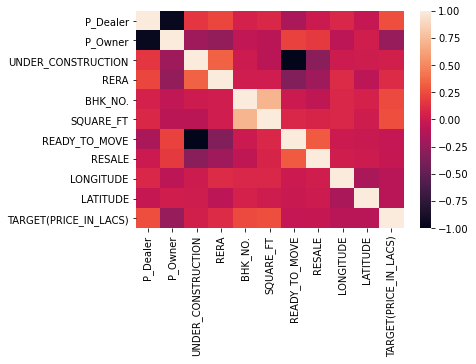

In [5]:
sns.heatmap(corr)

The correlation matrix and heatmap help us to analyse the relationship between variables. High correlation means that the two variables are strongly correlated. lower correlation between two variables means that the variables are weakly correlated. Positive correlation indicates that the increase of one variable led to the increase of other variable while negative correlation indicates that the increase of one variable let to the decrease of the other variable. Moreover, zero correlation indicates that the two variables are not correlation i.e no correlation i.e no relationship between these variables. Through heatmap, correlation is determined by the color in which it corresponds to. For instance, in this case, light-red indicates strong positive correlation which is changing to strong negative correlation as the color turning to dark

## Separating the Predictors and Target variables for training dataset

In [6]:
X_train = df_train.drop(columns='TARGET(PRICE_IN_LACS)')
y_train = df_train['TARGET(PRICE_IN_LACS)']


## Reading testing data

In [7]:
df_test = wrangle('test.csv')
df_test

,P_Dealer,P_Owner,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
1,1,0,1,1,2,800.000000,0,0,18.966114,73.148278
2,1,0,0,0,2,1257.096513,1,1,22.592200,88.484911
3,1,0,0,0,3,1400.329489,1,1,26.988300,75.584600
6,1,0,0,0,1,724.835886,1,1,19.032025,73.621535
7,1,0,1,1,1,778.842862,0,1,18.966670,72.833330
...,...,...,...,...,...,...,...,...,...,...
68712,1,0,0,0,2,941.129355,1,1,19.085225,73.661835
68713,1,0,0,0,3,1700.294718,1,1,28.622100,77.367400
68714,0,1,0,0,3,900.205761,1,1,26.860560,80.915830
68715,1,0,0,1,2,856.555505,1,1,19.180000,72.963330


## Extracting the Predictors variables from testing dataset

In [8]:
X_test = df_test


# Building Linear Regression Model

In [9]:
model = LinearRegression().fit(X_train,y_train)

y_pred_training = model.predict(X_train)

# Obtaing the predictions for the training dataset
y_pred_training


array([ 67.87267495, 113.31196158,  53.34680405, ...,  69.83451953,
        50.22928934,  75.25897032])

In [10]:
# Obtaining the predictions for the testing dataset

y_test_prediction = model.predict(X_test)
y_test_prediction

array([103.75707897,  76.83084593, 106.29930018, ...,  37.03039628,
        94.25675622,  97.43794681])

In [11]:
# Printing the columns in training dataset
X_train.columns

Index(['P_Dealer', 'P_Owner', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE', 'LATITUDE'],
      dtype='object')

## Creating a function called make_prediction that will return the predicted house price depending on the features inserted in the function

In [12]:
def make_prediction(Posted_by_Dealer, Posted_by_owner, UNDER_CONSTRUCTION, RERA,Number_rooms,Area_in_feet,
                   READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE):
    
    data = {"P_Dealer":Posted_by_Dealer,"P_Owner":Posted_by_owner,"UNDER_CONS":UNDER_CONSTRUCTION,
            "RERA":RERA,"BHK_NO":Number_rooms,"SQUARE_FT":Area_in_feet,"R_TO_M":READY_TO_MOVE,"RESALE":RESALE,
           "LON":LONGITUDE,"LAT":LATITUDE}
    
    df = pd.DataFrame(data, index=[0])
    
    prediction = model.predict(df).round(2)[0]
    
    return f"Predicted house price in LACS: {prediction}"

### returning out price prediction due to feature values inserted in function

In [13]:
make_prediction(1,0,1,1,2,800.00,0,0,18.966114,73.148278)

'Predicted house price in LACS: 103.76'

# Creating Dynamic Dashboard For House Price Prediction

In [15]:
interact(
    make_prediction,
    Posted_by_Dealer = Dropdown(options=sorted(X_train["P_Dealer"].unique())),
    Posted_by_owner = Dropdown(options=sorted(X_train["P_Owner"].unique())),
    UNDER_CONSTRUCTION = Dropdown(options=sorted(X_train["UNDER_CONSTRUCTION"].unique())),
    RERA = Dropdown(options=sorted(X_train["RERA"].unique())),
    
    Number_rooms = IntSlider(
        min=X_train["BHK_NO."].min(),
        max=X_train["BHK_NO."].max(),
        value=X_train["BHK_NO."].mean(),
    ),
    Area_in_feet = IntSlider(
        min=X_train["SQUARE_FT"].min(),
        max=X_train["SQUARE_FT"].max(),
        value=X_train["SQUARE_FT"].mean(),
    ),
    READY_TO_MOVE = Dropdown(options=sorted(X_train["READY_TO_MOVE"].unique())),
    
    RESALE = Dropdown(options=sorted(X_train["RESALE"].unique())),
    
    LONGITUDE = FloatSlider(
        min=X_train["LONGITUDE"].min(),
        max=X_train["LONGITUDE"].max(),
        step=0.01,
        value=X_train["LONGITUDE"].mean(),
    ),
     LATITUDE = FloatSlider(
        min=X_train["LATITUDE"].min(),
        max=X_train["LATITUDE"].max(),
        step=0.01,
        value=X_train["LATITUDE"].mean(),
    ),
    
);

interactive(children=(Dropdown(description='Posted_by_Dealer', options=(0, 1), value=0), Dropdown(description=…

# Conclusion

For instance, a user can enter number of rooms, Area of the house, select if the house is posted by the dealer or the owner, select if the house is under construction, select if RERA is approaved or not, select if it is ready to move or resale condition and then supply latitude-longitude coordinates and then get predictions about the price of that particular house. this is a dynamic dashboards that turn ML model from a complicated abstraction to a concrete tool that anyone can access. One of the most important parts of data science projects is creating products that people can use to make their work or lives easier